In [2]:
%run NormalEq.py
%run starter.py

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def print_info(loss, train_a, valid_a, test_a, type, alpha, reg, comp_time):    
    if type is "GD":
        print('Batch GD with \u03B1 = {}, \u03BB = {}, MSE = {}, training accuracy = {}, valid accuracy = {}, test accuracy = {}, '
            'computation time = {} ms'.format(alpha, reg, loss, train_a, valid_a, test_a, int(comp_time * 1000)))
    elif type is "normal":
        print('Normal Equation with \u03BB = {}, MSE = {}, training accuracy = {}, valid accuracy = {}, test accuracy = {}, '
            'computation time = {} ms'.format(reg, loss, train_a, valid_a, test_a, int(comp_time * 1000)))

def linreg():
    #1.3

    import starter
    import time

    trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()
    trainData = np.array([x.flatten() for x in trainData])
    validData = np.array([x.flatten() for x in validData])
    testData = np.array([x.flatten() for x in testData])


    alpha1, alpha2, alpha3 = 0.005, 0.001, 0.0001
    reg = 0
    epochs = 5000
    error_tol = 1e-7

    init_weight = np.random.normal(size=(784,1))
    init_bias = np.random.uniform(-1,1)

    start1 = time.time()
    weight_train1, bias_train1, loss_train1 = grad_descent(init_weight, init_bias, trainData, trainTarget, alpha1, epochs, reg, error_tol)
    end1 = time.time()
    start2 = time.time()
    weight_train2, bias_train2, loss_train2 = grad_descent(init_weight, init_bias, trainData, trainTarget, alpha2, epochs, reg, error_tol)
    end2 = time.time()
    start3 = time.time()
    weight_train3, bias_train3, loss_train3 = grad_descent(init_weight, init_bias, trainData, trainTarget, alpha3, epochs, reg, error_tol)
    end3 = time.time()


    accuracy_train1 = accuracy_calculation(weight_train1, bias_train1, trainData, trainTarget)
    accuracy_train2 = accuracy_calculation(weight_train2, bias_train2, trainData, trainTarget)
    accuracy_train3 = accuracy_calculation(weight_train3, bias_train3, trainData, trainTarget)

    plt.figure()
    plt.suptitle('Training losses')
    plt.plot(loss_train1,'',loss_train2,'',loss_train3,'')
    plt.xlabel('epochs')
    plt.ylabel('losses')
    plt.grid()
    plt.legend(['MSE: \u03B1 = {}, \u03BB = {}'.format(alpha1, reg),'MSE: \u03B1 = {}, \u03BB = {}'.format(alpha2, reg),'MSE: \u03B1 = {}, \u03BB = {}'.format(alpha3, reg)])
    plt.savefig('Learning_rate_adjustment_training_loss_LinReg.png')


    plt.figure()
    plt.suptitle('Training accuracy')
    plt.plot(accuracy_train1,'',accuracy_train2,'',accuracy_train3,'')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['MSE: \u03B1 = {}, \u03BB = {}'.format(alpha1, reg),'MSE: \u03B1 = {}, \u03BB = {}'.format(alpha2, reg),'MSE: \u03B1 = {}, \u03BB = {}'.format(alpha3, reg)])
    plt.savefig('Learning_rate_adjustment_training_accuracy_LinReg.png')

    accuracy_valid1 = accuracy_calculation(weight_train1, bias_train1, validData, validTarget)
    accuracy_valid2 = accuracy_calculation(weight_train2, bias_train2, validData, validTarget)
    accuracy_valid3 = accuracy_calculation(weight_train3, bias_train3, validData, validTarget)

    plt.figure()
    plt.suptitle('Validation accuracy')
    plt.plot(accuracy_valid1,'',accuracy_valid2,'',accuracy_valid3,'')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['MSE: \u03B1 = {}, \u03BB = {}'.format(alpha1, reg),'MSE: \u03B1 = {}, \u03BB = {}'.format(alpha2, reg),'MSE: \u03B1 = {}, \u03BB = {}'.format(alpha3, reg)])
    plt.savefig('Learning_rate_adjustment_validation_accuracy_LinReg.png')

    accuracy_test1 = accuracy_calculation(weight_train1, bias_train1, testData, testTarget)
    accuracy_test2 = accuracy_calculation(weight_train2, bias_train2, testData, testTarget)
    accuracy_test3 = accuracy_calculation(weight_train3, bias_train3, testData, testTarget)

    plt.figure()
    plt.suptitle('Testing accuracy')
    plt.plot(accuracy_test1,'',accuracy_test2,'',accuracy_test3,'')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['MSE: \u03B1 = {}, \u03BB = {}'.format(alpha1, reg),'MSE: \u03B1 = {}, \u03BB = {}'.format(alpha2, reg),'MSE: \u03B1 = {}, \u03BB = {}'.format(alpha3, reg)])
    plt.savefig('Learning_rate_adjustment_testing_accuracy_LinReg.png')

    print_info(loss_train1[-1], accuracy_train1[-1], accuracy_valid1[-1], accuracy_test1[-1], "GD", alpha1, reg, end1 - start1)
    print_info(loss_train2[-1], accuracy_train2[-1], accuracy_valid2[-1], accuracy_test2[-1], "GD", alpha2, reg, end2 - start2)
    print_info(loss_train3[-1], accuracy_train3[-1], accuracy_valid3[-1], accuracy_test3[-1], "GD", alpha3, reg, end3 - start3)


    #1.4
    alpha = 0.005
    reg1, reg2, reg3 = 0.001, 0.1, 0.5
    
    start4 = time.time()
    weight_train4, bias_train4, loss_train4 = grad_descent(init_weight, init_bias, trainData, trainTarget, alpha, epochs, reg1, error_tol)
    end4 = time.time()
    start5 = time.time()
    weight_train5, bias_train5, loss_train5 = grad_descent(init_weight, init_bias, trainData, trainTarget, alpha, epochs, reg2, error_tol)
    end5 = time.time()
    start6 = time.time()
    weight_train6, bias_train6, loss_train6 = grad_descent(init_weight, init_bias, trainData, trainTarget, alpha, epochs, reg3, error_tol)
    end6 = time.time()


    accuracy_train4 = accuracy_calculation(weight_train4, bias_train4, trainData, trainTarget)
    accuracy_train5 = accuracy_calculation(weight_train5, bias_train5, trainData, trainTarget)
    accuracy_train6 = accuracy_calculation(weight_train6, bias_train6, trainData, trainTarget)

    plt.figure()
    plt.suptitle('Training losses')
    plt.plot(loss_train4,'',loss_train5,'',loss_train6,'')
    plt.xlabel('epochs')
    plt.ylabel('losses')
    plt.grid()
    plt.legend(['MSE: \u03B1 = {}, \u03BB = {}'.format(alpha, reg1),'MSE: \u03B1 = {}, \u03BB = {}'.format(alpha, reg2),'MSE: \u03B1 = {}, \u03BB = {}'.format(alpha, reg3)])
    plt.savefig('Regulation_adjustment_training_loss_LinReg.png')


    plt.figure()
    plt.suptitle('Training accuracy')
    plt.plot(accuracy_train4,'',accuracy_train5,'',accuracy_train6,'')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['MSE: \u03B1 = {}, \u03BB = {}'.format(alpha, reg1),'MSE: \u03B1 = {}, \u03BB = {}'.format(alpha, reg2),'MSE: \u03B1 = {}, \u03BB = {}'.format(alpha, reg3)])
    plt.savefig('Regulation_adjustment_training_accuracy_LinReg.png')

    accuracy_valid4 = accuracy_calculation(weight_train4, bias_train4, validData, validTarget)
    accuracy_valid5 = accuracy_calculation(weight_train5, bias_train5, validData, validTarget)
    accuracy_valid6 = accuracy_calculation(weight_train6, bias_train6, validData, validTarget)

    plt.figure()
    plt.suptitle('Validation accuracy')
    plt.plot(accuracy_valid4,'',accuracy_valid5,'',accuracy_valid6,'')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['MSE: \u03B1 = {}, \u03BB = {}'.format(alpha, reg1),'MSE: \u03B1 = {}, \u03BB = {}'.format(alpha, reg2),'MSE: \u03B1 = {}, \u03BB = {}'.format(alpha, reg3)])
    plt.savefig('Regulation_adjustment_validation_accuracy_LinReg.png')

    accuracy_test4 = accuracy_calculation(weight_train4, bias_train4, testData, testTarget)
    accuracy_test5 = accuracy_calculation(weight_train5, bias_train5, testData, testTarget)
    accuracy_test6 = accuracy_calculation(weight_train6, bias_train6, testData, testTarget)

    plt.figure()
    plt.suptitle('Testing accuracy')
    plt.plot(accuracy_test4,'',accuracy_test5,'',accuracy_test6,'')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['MSE: \u03B1 = {}, \u03BB = {}'.format(alpha, reg1),'MSE: \u03B1 = {}, \u03BB = {}'.format(alpha, reg2),'MSE: \u03B1 = {}, \u03BB = {}'.format(alpha, reg3)])
    plt.savefig('Regulation_adjustment_testing_accuracy_LinReg.png')

    print_info(loss_train4[-1], accuracy_train4[-1], accuracy_valid4[-1], accuracy_test4[-1], "GD", alpha, reg1, end4 - start4)
    print_info(loss_train5[-1], accuracy_train5[-1], accuracy_valid5[-1], accuracy_test5[-1], "GD", alpha, reg2, end5 - start5)
    print_info(loss_train6[-1], accuracy_train6[-1], accuracy_valid6[-1], accuracy_test6[-1], "GD", alpha, reg3, end6 - start6)


    #1.5
    start = time.time()
    w_normal_train, b_normal_train = normal_equation(trainData, trainTarget, reg)
    end = time.time()
    start1 = time.time()
    w_normal_train1, b_normal_train1 = normal_equation(trainData, trainTarget, reg1)
    end1 = time.time()
    start2 = time.time()
    w_normal_train2, b_normal_train2 = normal_equation(trainData, trainTarget, reg2)
    end2 = time.time()
    start3 = time.time()
    w_normal_train3, b_normal_train3 = normal_equation(trainData, trainTarget, reg3)
    end3 = time.time()
    
    loss_normal = MSE(w_normal_train, b_normal_train, trainData, trainTarget, reg)
    loss_normal1 = MSE(w_normal_train1, b_normal_train1, trainData, trainTarget, reg1)
    loss_normal2 = MSE(w_normal_train2, b_normal_train2, trainData, trainTarget, reg2)
    loss_normal3 = MSE(w_normal_train3, b_normal_train3, trainData, trainTarget, reg3)
    
    w_normal_train = [w_normal_train]
    w_normal_train1 = [w_normal_train1]
    w_normal_train2 = [w_normal_train2]
    w_normal_train3 = [w_normal_train3]
    b_normal_train = [b_normal_train]
    b_normal_train1 = [b_normal_train1]
    b_normal_train2 = [b_normal_train2]
    b_normal_train3 = [b_normal_train3]

    normal_accuracy_train = accuracy_calculation(w_normal_train, b_normal_train, trainData, trainTarget)
    normal_accuracy_train1 = accuracy_calculation(w_normal_train1, b_normal_train1, trainData, trainTarget)
    normal_accuracy_train2 = accuracy_calculation(w_normal_train2, b_normal_train2, trainData, trainTarget)
    normal_accuracy_train3 = accuracy_calculation(w_normal_train3, b_normal_train3, trainData, trainTarget)

    normal_accuracy_valid = accuracy_calculation(w_normal_train, b_normal_train, validData, validTarget)
    normal_accuracy_valid1 = accuracy_calculation(w_normal_train1, b_normal_train1, validData, validTarget)
    normal_accuracy_valid2 = accuracy_calculation(w_normal_train2, b_normal_train2, validData, validTarget)
    normal_accuracy_valid3 = accuracy_calculation(w_normal_train3, b_normal_train3, validData, validTarget)

    normal_accuracy_test = accuracy_calculation(w_normal_train, b_normal_train, testData, testTarget)
    normal_accuracy_test1 = accuracy_calculation(w_normal_train1, b_normal_train1, testData, testTarget)
    normal_accuracy_test2 = accuracy_calculation(w_normal_train2, b_normal_train2, testData, testTarget)
    normal_accuracy_test3 = accuracy_calculation(w_normal_train3, b_normal_train3, testData, testTarget)

    print_info(loss_normal, normal_accuracy_train[0], normal_accuracy_valid[0], normal_accuracy_test[0], "normal", 0, reg, end - start)
    print_info(loss_normal1, normal_accuracy_train1[0], normal_accuracy_valid1[0], normal_accuracy_test1[0], "normal", 0, reg1, end1 - start1)
    print_info(loss_normal2, normal_accuracy_train2[0], normal_accuracy_valid2[0], normal_accuracy_test2[0], "normal", 0, reg2, end2 - start2)
    print_info(loss_normal3, normal_accuracy_train3[0], normal_accuracy_valid3[0], normal_accuracy_test3[0], "normal", 0, reg3, end3 - start3)

Batch GD with α = 0.005, λ = 0, MSE = 1.1471017715627532, training accuracy = 0.6905714285714286, valid accuracy = 0.62, test accuracy = 0.6551724137931034, computation time = 11686 ms
Batch GD with α = 0.001, λ = 0, MSE = 4.1921748921434645, training accuracy = 0.6077142857142858, valid accuracy = 0.6, test accuracy = 0.5241379310344828, computation time = 10936 ms
Batch GD with α = 0.0001, λ = 0, MSE = 15.15142616861563, training accuracy = 0.5488571428571428, valid accuracy = 0.57, test accuracy = 0.496551724137931, computation time = 9578 ms
Batch GD with α = 0.005, λ = 0.001, MSE = 1.2857616150038913, training accuracy = 0.6945714285714286, valid accuracy = 0.62, test accuracy = 0.6620689655172414, computation time = 10255 ms
Batch GD with α = 0.005, λ = 0.1, MSE = 0.17662002901600576, training accuracy = 0.9665714285714285, valid accuracy = 0.97, test accuracy = 0.9586206896551724, computation time = 10582 ms
Batch GD with α = 0.005, λ = 0.5, MSE = 0.03773931198813707, training a

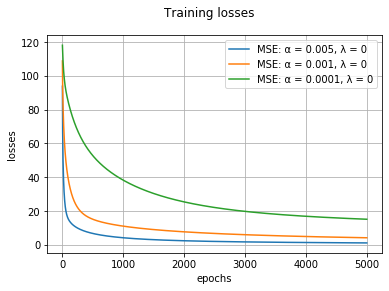

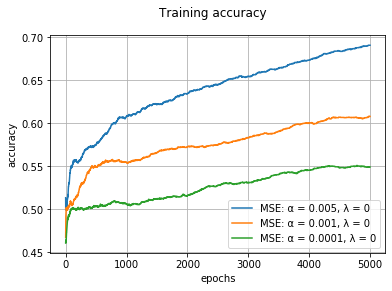

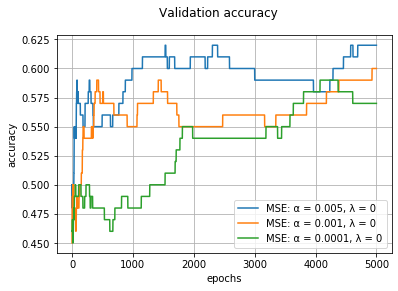

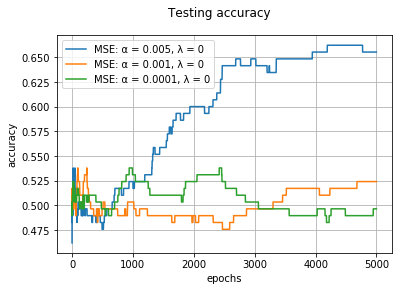

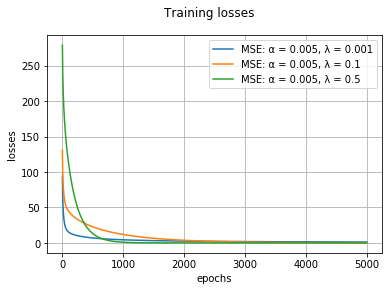

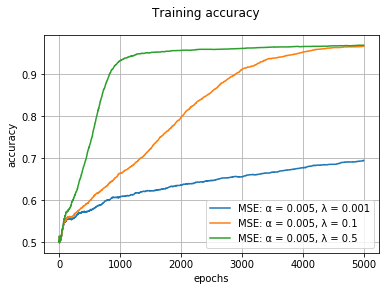

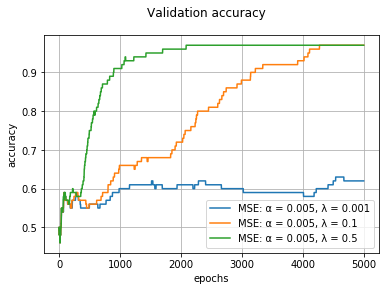

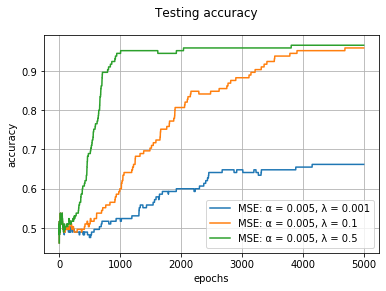

In [4]:
linreg()